# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [2]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size. 


In [3]:
class Node:
    """
    Node class for Huffman tree
    """
    def __init__(self, probability, symbol, left_child=None, right_child=None):
        self.probability = probability
        self.left_child = left_child
        self.right_child = right_child
        self.symbol = symbol

def get_codeword(node, codeword):
    """
    Recursively get the codeword for each node in the Huffman tree
    
    Arguments:
    ----------
    node: root node of the Huffman tree
    codeword: codeword already built (accumulator)
    
    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword 
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    
    """
    if node.left_child is None and node.right_child is None:
        return {node.symbol: codeword}
    else:
        codeword_left = codeword + "0"
        codeword_right = codeword + "1"
        codewords = get_codeword(node.left_child, codeword_left)
        codewords.update(get_codeword(node.right_child, codeword_right))
        return codewords

def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities  
    
    Arguments:
    ----------
    probability_dict:
      - keys: symbol as character or string
      - values: probability of the symbol as a float or double
      Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}
    
    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword 
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    
    """ 
    # Create the nodes of the tree from the probabilities
    nodes = []
    for symbol, probability in probability_dict.items():
        nodes.append(Node(probability, symbol))

    # Sort the list of Node objects by probability
    nodes.sort(key=lambda x: x.probability)

    # Create the Huffman tree
    while len(nodes) > 1:
        left = nodes.pop(0)
        right = nodes.pop(0)
        parent = Node(left.probability + right.probability, None, left, right)
        nodes.append(parent)
        nodes.sort(key=lambda x: x.probability)

    # Get the codewords on the root of the tree
    codewords = get_codeword(nodes[0], "")
    return codewords

# Verification on the exerice 7 of the second exercise session (TP2)
print("Code word of the alphabet of the exercise 7 of the second exercise session (TP2): {}".format(Huffman_code({"A": 0.05, "B":0.1,"C":0.15,"D":0.15, "E":0.2, "F":0.35})))

Code word of the alphabet of the exercise 7 of the second exercise session (TP2): {'A': '000', 'B': '001', 'E': '01', 'C': '100', 'D': '101', 'F': '11'}


### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course. 

In [4]:
def get_least_significant_bit(number, bit_number):
    """
    Get the least significant bit of a number and convert it to a binary string with bit_number digits
    Example: get_least_significant_bit(1011, 2) -> "01"
    """
    bit = number[-1]
    return "0" * (bit_number - 1) + bit

def get_first_bits(number):
    """
    Get the all except the last bit of a binary number represented as a string
    Example: get_first_bits('101') -> '10'
    """
    return number[0:len(number)-1]

def get_binary_representation(number, bit_number):
    """
    Get the binary representation of a number
    Example: get_binary_representation(5, 4) -> '0101'
    """
    return bin(number)[2:].zfill(bit_number)

def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols  
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    
    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized address with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """
    # Initialization of the dictionary
    dictionnary = {}
    dictionnary[''] = (0, '')

    prefix = ''
    position = 1

    encoded_sequence = ''
    # Build the dictionary and encode the sequence
    for symbol in sequence:
        if prefix + symbol not in dictionnary:
            # Get the 'on-line' necessary number of bits 
            bit_number = int(np.ceil(np.log2(len(dictionnary))) + 1)
            if len(prefix + symbol) == 1:
                dictionnary[prefix + symbol] = (position, get_least_significant_bit(prefix + symbol, bit_number))
            else: 
                dictionnary[prefix + symbol] = (position, get_binary_representation(dictionnary[get_first_bits(prefix + symbol)][0], bit_number - 1) + get_least_significant_bit(prefix + symbol, 1))
            encoded_sequence += dictionnary[prefix + symbol][1]
            prefix = ''
            position += 1
        else:
            prefix += symbol

    return dictionnary, encoded_sequence

print("Encoding of example given in the course State of the art in data compression, slide 50/53:\nInitial sequence: 1011010100010\nDictionnary: {}\nEncoded sequence: {}".format(LZ_online("1011010100010")[0], LZ_online("1011010100010")[1]))

Encoding of example given in the course State of the art in data compression, slide 50/53:
Initial sequence: 1011010100010
Dictionnary: {'': (0, ''), '1': (1, '1'), '0': (2, '00'), '11': (3, '011'), '01': (4, '101'), '010': (5, '1000'), '00': (6, '0100'), '10': (7, '0010')}
Encoded sequence: 100011101100001000010


### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [5]:
def find_match(sequence, window):
    distance = len(window)
    matching_string = ""

    for character in sequence:
        matching_string_tmp = matching_string + character
        distance_tmp = window.rfind(matching_string_tmp)

        if distance_tmp < 0:
            break

        matching_string = matching_string_tmp
        distance = distance_tmp

    return len(matching_string), len(window) - distance

def LZ77(sequence, window_size = 7):
    window = ""
    result = ""

    while len(sequence) != 0:
        size, distance = find_match(sequence, window)

        window += sequence[:size + 1]
        window = window[-window_size:]

        sequence = sequence[size:]
        last_character = sequence[:1]
        sequence = sequence[1:]

        result += str(distance) + str(size) + str(last_character)

    return result

print("Example given in Figure 2 with window_size = 7: {}".format(LZ77("abracadabrad")))

Example given in Figure 2 with window_size = 7: 00a00b00r31c21d74d


In [6]:
# [Locked Cell] Evaluation of your functions by the examiner. 
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


In [7]:
# Read Morse file
morseFile = open("data/morse.txt", "r")
morseText = morseFile.read()
morseFile.close()
print("Length of Morse text = " + str(len(morseText)) + " symbols")

# Read text file
textFile = open("data/text.txt", "r")
text = textFile.read()
textFile.close()
print("Length of text = " + str(len(text)) + " symbols")

Length of Morse text = 1199290 symbols
Length of text = 412310 symbols


### Question 5

In [8]:
# Compute marginal probability distribution
probas = {}
for symbol in morseText:
    symb = probas.get(symbol)
    if symb == None:
        probas[symbol] = 1
    else:
        probas[symbol] = symb + 1
for key in probas.keys():
    probas[key]/=len(morseText)

print("Probabilities: ", end="")
print(probas)

# Binary Huffman code
binHuffmanCode = Huffman_code(probas)
print("Huffman code: ", end="")
print(binHuffmanCode)

# Encode text with Huffman code
encodedMorseText = ""
for symbol in morseText:
    encodedMorseText+=binHuffmanCode[symbol]
#print(encodedMorseText)

# Total length of encoded Morse text
print("Length of encoded morse text = " + str(len(encodedMorseText)) + " bits")
# ceil(log_2(4)) = 2 = number of bits for 4 symbols
print("Length of morse text = " + str(len(morseText)*np.ceil(np.log2(4))) + " bits")

# Compression rate
compressionRate = (len(morseText)*2)/len(encodedMorseText)
print("Compression rate = " + str(compressionRate))

Probabilities: {'.': 0.43378082031868853, '_': 0.2145202578192097, '-': 0.2870623452209224, '/': 0.06463657664117936}
Huffman code: {'.': '0', '/': '100', '_': '101', '-': '11'}
Length of encoded morse text = 2213141 bits
Length of morse text = 2398580.0 bits
Compression rate = 1.0837899618686744


### Question 6

In [9]:
# Expected average length of Huffman code
avgLengthHuffman = 0.0
for key in probas.keys():
    avgLengthHuffman+=probas[key]*len(binHuffmanCode[key])
print("Expected average length of Huffman code = " + str(avgLengthHuffman))

# Emperical = ratio length encoded and length initial
emperical = len(encodedMorseText) / len(morseText)
print("Emperical average length of Huffman code = " + str(emperical))

# Entropy
entropy = 0.0
for key in probas.keys():
    entropy+=probas[key]*np.log2(probas[key])

print("H(S)/log2(q) = " + str(-entropy)) # log2(2) = 1
print("(H(S)/log2(q)) + 1 = " + str(-entropy+1))

Expected average length of Huffman code = 1.8453760141417006
Emperical average length of Huffman code = 1.8453760141417006
H(S)/log2(q) = 1.7713848706432271
(H(S)/log2(q)) + 1 = 2.771384870643227


### Question 7

In [10]:
# Compute data
codes = {}
empericalAverages = {}
for inputLength in range(1, len(morseText)):
    if len(morseText) % inputLength == 0:
        indexStart = 0
        indexEnd = inputLength - 1
        nbBlocks = 0.0
        probas = {}
        while indexEnd < len(morseText):
            subText = morseText[indexStart : indexEnd+1]
            symb = probas.get(subText)
            if symb == None:
                probas[subText] = 1
            else:
                probas[subText] = symb + 1
            nbBlocks+=1.0
            indexStart += inputLength
            indexEnd += inputLength
        for key in probas.keys():
            probas[key]/=nbBlocks
        codes[inputLength] = Huffman_code(probas)
        
        encodedMorseText = ""
        indexStart = 0
        indexEnd = inputLength - 1
        while indexEnd < len(morseText):
            encodedMorseText+=codes[inputLength][morseText[indexStart : indexEnd+1]]
            indexStart += inputLength
            indexEnd += inputLength
        empericalAverages[inputLength] = len(encodedMorseText) / len(morseText)
print(empericalAverages)

{1: 1.8453760141417006, 2: 1.709244636409876, 5: 1.5083299285410534, 10: 1.245440218796121, 119929: 2.8350107146728482e-05, 239858: 1.0005920169433581e-05, 599645: 1.6676533615722636e-06}


### Question 11

In [11]:
def LZ77_Huffman(sequence, window_size):
    LZ77_seq = LZ77(sequence, window_size = window_size)
    triplets = []
    triplet = ""

    for i, character in enumerate(LZ77_seq):
        if i != 0 and not i % 3:
            triplets.append(triplet)
            triplet = ""

        triplet += character
        i += 1

    values, counts = np.unique(triplets, return_counts = True, axis = 0)

    probabilities = counts / sum(counts)
    dictionnary = dict(zip(values, probabilities))

    code = Huffman_code(dictionnary)

    encodedMorseText = ''

    for triplet in triplets:
        encodedMorseText += code[triplet]

    return encodedMorseText
    
encodedMorseText = LZ77_Huffman(morseText, 7)
compressionRate = (len(morseText) * 2) / len(encodedMorseText)
print("Length of encoded morse text = {} bits".format(str(len(encodedMorseText))))
print("Compression rate = {}".format(str(compressionRate)))

Length of encoded morse text = 2769904 bits
Compression rate = 0.8659433684344295


### Question 12

In [30]:
lengthsLZ77Huffman = []
compressionRatesLZ77Huffman = []

lengthsLZ77 = []
compressionRatesLZ77 = []

for window_size in range(1, 12001, 1000):
    encodedMorseTextLZ77Huffman = LZ77_Huffman(morseText, window_size)
    encodedMorseTextLZ77 = LZ77(morseText, window_size)

    lengthLZ77Huffman = len(encodedMorseTextLZ77Huffman)
    lengthsLZ77Huffman.append([window_size, lengthLZ77Huffman])

    compressionRateLZ77Huffman = (len(morseText) * 2) / len(encodedMorseTextLZ77Huffman)
    compressionRatesLZ77Huffman.append([window_size, compressionRateLZ77Huffman])

    tripletNumber = 0

    for symbol in encodedMorseTextLZ77:
        if symbol in "-_/.":
            tripletNumber += 1
    
    lengthsLZ77.append([window_size, int(tripletNumber * (2 * np.ceil(np.log2(window_size + 1)) + 2))])

    compressionRateLZ77 = (len(morseText) * 2) / int(tripletNumber * (2 * np.ceil(np.log2(window_size + 1)) + 2))
    compressionRatesLZ77.append([window_size, compressionRateLZ77])

encodedLZOnline = LZ_online(morseText)[1]

print("Lengths")
print("Huffman combined with LZ77")
for pair in lengthsLZ77Huffman : print("Window size: {}, length: {} bits".format(pair[0], pair[1]))
print("LZ77")
for pair in lengthsLZ77 : print("Window size: {}, length: {} bits".format(pair[0], pair[1]))
print("LZ online")
print("Length: {} bits\n".format(len(encodedLZOnline)))

print("Compression rates")
print("Huffman combined with LZ77")
for pair in compressionRatesLZ77Huffman : print("Window size: {}, compression rate: {}".format(pair[0], pair[1]))
print("LZ77")
for pair in compressionRatesLZ77 : print("Window size: {}, compression rate: {}".format(pair[0], pair[1]))
print("LZ online")
print("Compression rate: {}".format((len(morseText) * 2) / len(encodedLZOnline)))

Lengths
Huffman combined with LZ77
Window size: 1, length: 2574093 bits
Window size: 1001, length: 2227673 bits
Window size: 2001, length: 2103336 bits
Window size: 3001, length: 2038045 bits
Window size: 4001, length: 1992454 bits
Window size: 5001, length: 1957754 bits
Window size: 6001, length: 1928162 bits
Window size: 7001, length: 1903170 bits
Window size: 8001, length: 1882121 bits
Window size: 9001, length: 1864961 bits
Window size: 10001, length: 1848255 bits
Window size: 11001, length: 1840006 bits
LZ77
Window size: 1, length: 3965216 bits
Window size: 1001, length: 2703888 bits
Window size: 2001, length: 2564544 bits
Window size: 3001, length: 2580890 bits
Window size: 4001, length: 2454972 bits
Window size: 5001, length: 2546684 bits
Window size: 6001, length: 2469908 bits
Window size: 7001, length: 2407188 bits
Window size: 8001, length: 2355836 bits
Window size: 9001, length: 2478390 bits
Window size: 10001, length: 2435940 bits
Window size: 11001, length: 2400840 bits
LZ

### Question 14

In [13]:
# Compute probability distribution
probas = {}
for letter in text:
    proba = probas.get(letter)
    if proba == None:
        probas[letter] = 1
    else:
        probas[letter] = proba + 1
for letter in probas:
    probas[letter]/=len(text)

# Binary Huffman code
code = Huffman_code(probas)
print(code)

# Expected average length
avgLengthHuffman = 0.0
for key in probas.keys():
    avgLengthHuffman+=probas[key]*len(code[key])
print("Expected average length of Huffman code = " + str(avgLengthHuffman))

encodedText = ""
for symbol in text:
    encodedText+=code[symbol]

# Experimental length of the encoded text
length = len(encodedText)
print("Experimental length of encoded text = " + str(length) + " bits")

# Compression rate
# ceil(log_2(27)) = 5 = number of bits for 27 symbols
compressionRate = (len(text)*np.ceil(np.log2(27)))/len(encodedText)
print("Compression rate = " + str(compressionRate))

{'g': '00000', 'u': '00001', 's': '0001', 'e': '001', 'i': '0100', 'r': '0101', 'n': '0110', 'h': '0111', 'b': '100000', 'p': '100001', 'c': '100010', 'f': '100011', 'o': '1001', 'a': '1010', 't': '1011', 'l': '11000', 'm': '110010', 'k': '1100110', 'z': '1100111000', 'j': '1100111001', 'x': '1100111010', 'q': '1100111011', 'v': '11001111', 'd': '11010', 'w': '110110', 'y': '110111', ' ': '111'}
Expected average length of Huffman code = 4.150466881715214
Experimental length of encoded text = 1711279 bits
Compression rate = 1.2046837482374295


## Channel coding

In [14]:
# Write here your codes for questions 16 to 21 (you may delete this comment)
# From here, you may import either opencv (cv2) or the Python Imaging Library (PIL), but no other extra libraries.
import cv2

# TO REMOVE before submit
%matplotlib inline
from matplotlib import pyplot as plt

### Question 16

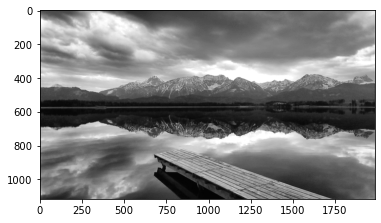

Image height = 1116px
Image width = 1984px


In [15]:
"""
Read image located at path and show it.
Parameters:
    - path: Path to the image.
Return:
Image that has been read.
"""
def read_and_show_img(path: str):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # For test - TO REMOVE
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()
    ''' CODE FOR SUBMIT
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    '''
    return image
image = read_and_show_img("data/image.png")
height = len(image)
width = len(image[0])
print("Image height = " + str(height) + "px")
print("Image width = " + str(width) + "px")

### Question 17

In [16]:
"""
Encode the image signal using a fixed-length binary code.
Parameters:
    - image: Image to encode.
Return:
List of strings where each string is the binary representation of a pixel from left to right and top to bottom.
"""
def encodeImage(image) -> list:
    encoded = []
    for row in image:
        for pixel in row:
            encoded.append(np.binary_repr(pixel, width=8)) # 8 because log_2(256) = 8

    return encoded

imageSignal = encodeImage(image)

### Question 18

In [17]:
# Simulate the channel effect on the binary image signal
ERROR_RATE = 0.01

# Simulate potential errors
imageAfterChannel = []
for pixel in imageSignal:
    px = ""
    for bit in pixel:
        if np.random.uniform(0.0, 1.0, 1)[0] <= ERROR_RATE:
            if bit == '1':
                px+='0'
            else:
                px+='1'
        else:
            px+=bit
    imageAfterChannel.append(px)

# Save image
imageAfter = image.copy()
rowIndex = 0
colIndex = 0
for pixel in imageAfterChannel:
    imageAfter[rowIndex][colIndex] = int(pixel, 2)
    colIndex+=1
    if colIndex >= width:
        colIndex = 0
        rowIndex+=1
cv2.imwrite("q18.png", imageAfter)

# Show image
read_and_show_img("q18.png")

KeyboardInterrupt: 

### Question 19

In [ ]:
"""
Compute the Hamming(7,4) code for a list of pixels.
Parameters:
    - pixels: List of pixels where each pixel is represented by a string of its binary representation.
Return:
Hamming(7,4) code for the list of pixels as a string.
"""
def Hamming_7_4(pixels: list) -> str:

    """
    Compute the Hamming(7,4) code for 4 bits (half a pixel).
    Parameter: 4 bits as a string.
    Return: Hamming(7,4) code for the 4 bits.
    """
    def pixelCode(halfPixel: str) -> str:
        code = halfPixel
        m0 = int(halfPixel[0], 2)
        m1 = int(halfPixel[1], 2)
        m2 = int(halfPixel[2], 2)
        m3 = int(halfPixel[3], 2)
        code += str((m0+m1+m2)%2)
        code += str((m1+m2+m3)%2)
        code += str((m0+m2+m3)%2)
        return code

    encoded = ""
    for pixel in pixels:
        halfLeft = pixel[0:4]
        halfRight = pixel[4:8]
        encoded += pixelCode(halfLeft)
        encoded += pixelCode(halfRight)

    return encoded

HammingSignal = Hamming_7_4(imageSignal)


### Question 20

In [ ]:
# Simulate the channel effect on the binary signal with redundancy
ERROR_RATE = 0.01
HammingAfterChannel = ""
for bit in HammingSignal:
    px = ""
    if np.random.uniform(0.0, 1.0, 1)[0] <= ERROR_RATE:
        if bit == '1':
            px='0'
        else:
            px='1'
    else:
        px=bit
    HammingAfterChannel+=px

In [ ]:
# Decode after simulating channel
"""
Decode a Hamming(7,4) chunk (7 bits). Apply syndrome decoding.
Parameter:
    - chunk: A Hamming(7,4) chunk (7 bits) as a string.
Return:
The 4 source bits as a string.
"""
def decode(chunk: str) -> str:
    m0, m1, m2, m3 = int(chunk[0], 2), int(chunk[1], 2), int(chunk[2], 2), int(chunk[3], 2)
    p1 = (m0+m1+m2)%2
    p2 = (m1+m2+m3)%2
    p3 = (m0+m2+m3)%2

    check1 = (p1 + int(chunk[4]))%2
    check2 = (p2 + int(chunk[5]))%2
    check3 = (p3 + int(chunk[6]))%2

    # 2 or 3 parity bits are different -> error in one of the source bits
    if check1 + check2 + check3 >= 2:
        if check1 and check1 and not check3:
            str1 = "1" if m1 == 0 else "0"
            return chunk[0]+str1+chunk[2]+chunk[3]
        elif not check1 and check2 and check3:
            str3 = "1" if m3 == 0 else "0"
            return chunk[0]+chunk[1]+chunk[2]+str3
        elif check1 and not check2 and check3:
            str0 = "1" if m0 == 0 else "0"
            return str0+chunk[1]+chunk[2]+chunk[3]
        else:
            str2 = "1" if m2 == 0 else "0"
            return chunk[0]+chunk[1]+str2+chunk[3]
    else: # 0 or 1 bit is different -> no error or error in parity bit -> do not care
        return chunk[0]+chunk[1]+chunk[2]+chunk[3]

indexBegin, indexEnd = 0, 6
nbBits = len(HammingAfterChannel)
decoded = ""
while indexEnd < nbBits:
    halfPixel = decode(HammingAfterChannel[indexBegin : indexEnd+1])
    decoded+=halfPixel
    indexBegin+=7
    indexEnd+=7

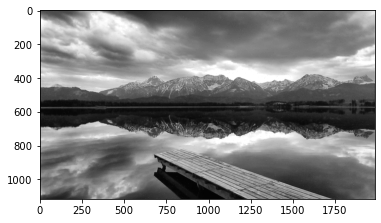

array([[ 78,  81,  83, ..., 228, 234, 238],
       [ 79,  81,  82, ..., 228, 233, 237],
       [ 81,  81,  81, ..., 227, 232, 236],
       ...,
       [ 70,  68,  65, ..., 139, 115,  92],
       [ 67,  65,  63, ..., 141, 118,  95],
       [ 64,  63,  62, ..., 142, 120,  96]], dtype=uint8)

In [ ]:
# Display decoded image
imageHammingDecoded = image.copy()
rowIndex, colIndex = 0, 0
indexBegin, indexEnd = 0, 7
nbBits = len(decoded)
while indexEnd < nbBits:
    imageHammingDecoded[rowIndex][colIndex] = int(decoded[indexBegin : indexEnd+1], 2)
    indexBegin+=8
    indexEnd+=8
    colIndex+=1
    if colIndex >= width:
        colIndex = 0
        rowIndex+=1

cv2.imwrite("q20.png", imageHammingDecoded)

# Show image
read_and_show_img("q20.png")